### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import seaborn as sns
import datetime as dt

In [2]:
sns.set_style("whitegrid")

### Import Dataset

In [3]:
df = pd.read_csv("UK_House_Prices.csv")
df.head()

,Date,RegionName,AreaCode,AveragePrice,1m%Change,12m%Change,SalesVolume,DetachedPrice,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,Terraced1m%Change,Terraced12m%Change,FlatPrice,Flat1m%Change,Flat12m%Change
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,NaN,NaN,388.0,122490.0641,NaN,NaN,70563.15784,NaN,NaN,55319.63336,NaN,NaN,48016.07412,NaN,NaN
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,-0.018248,NaN,326.0,121280.8840,-0.987166,NaN,70804.42408,0.341915,NaN,55720.07531,0.723869,NaN,49030.18133,2.112016,NaN
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,2.260483,NaN,453.0,123395.4269,1.743509,NaN,72689.07253,2.661767,NaN,57362.85925,2.948280,NaN,50349.44771,2.690723,NaN
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,0.968071,NaN,571.0,122334.0258,-0.860162,NaN,74484.23119,2.469640,NaN,59193.39722,3.191155,NaN,51736.22329,2.754301,NaN
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,2.426403,NaN,502.0,124498.8747,1.769621,NaN,76637.73414,2.891220,NaN,61202.79629,3.394634,NaN,53230.23061,2.887739,NaN


In [4]:
# Format Date
df["Date"] = pd.to_datetime(df["Date"])

def get_date(x):
    return dt.datetime(x.year, x.day, x.month)

df["Date"] = df["Date"].apply(get_date)

In [5]:
df.set_index("Date", inplace = True)

In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132076 entries, 2004-01-01 to 2021-01-01
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RegionName              132076 non-null  object 
 1   AreaCode                132076 non-null  object 
 2   AveragePrice            132076 non-null  float64
 3   1m%Change               131625 non-null  float64
 4   12m%Change              126940 non-null  float64
 5   SalesVolume             127565 non-null  float64
 6   DetachedPrice           125983 non-null  float64
 7   Detached1m%Change       125566 non-null  float64
 8   Detached12m%Change      121003 non-null  float64
 9   SemiDetachedPrice       125983 non-null  float64
 10  SemiDetached1m%Change   125566 non-null  float64
 11  SemiDetached12m%Change  121003 non-null  float64
 12  TerracedPrice           126010 non-null  float64
 13  Terraced1m%Change       125593 non-null  float64
 14  Terr

In [7]:
# Data statistics
df.describe()

,AveragePrice,1m%Change,12m%Change,SalesVolume,DetachedPrice,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,Terraced1m%Change,Terraced12m%Change,FlatPrice,Flat1m%Change,Flat12m%Change
count,1.320760e+05,131625.000000,126940.000000,127565.000000,1.259830e+05,125566.000000,121003.000000,1.259830e+05,125566.000000,121003.000000,1.260100e+05,125593.000000,121030.000000,1.262960e+05,125878.000000,121304.000000
mean,1.616589e+05,0.565136,6.477489,1195.712366,2.837003e+05,0.503588,6.324428,1.814159e+05,0.519535,6.514690,1.440571e+05,0.523141,6.597609,1.117276e+05,0.457118,5.878905
std,1.080366e+05,2.013028,9.074780,7487.187353,2.428807e+05,1.768216,8.204458,1.860245e+05,1.756560,8.676230,1.368851e+05,1.790401,9.034137,8.532877e+04,1.834379,9.493072
min,2.712016e+03,-30.297781,-35.786566,2.000000,4.064610e+04,-19.628465,-30.193434,2.571306e+04,-19.668017,-29.358801,2.045985e+04,-19.960934,-29.446217,1.619875e+04,-30.295111,-28.681580
25%,9.033228e+04,-0.451203,1.315176,138.000000,1.586116e+05,-0.465212,1.509857,9.777570e+04,-0.435027,1.532920,7.630535e+04,-0.459400,1.397437,6.324589e+04,-0.548252,-0.030901
50%,1.430881e+05,0.519317,5.360300,212.000000,2.304577e+05,0.489011,5.435925,1.443733e+05,0.507697,5.417218,1.162103e+05,0.509522,5.412384,9.600888e+04,0.434729,4.519683
75%,2.035364e+05,1.524107,10.679243,367.000000,3.298759e+05,1.484031,10.498743,2.093854e+05,1.470202,10.590285,1.706845e+05,1.504073,10.840302,1.344125e+05,1.443969,10.467223
max,1.463378e+06,35.286646,98.437940,146470.000000,3.755824e+06,34.812357,92.630423,3.784875e+06,35.295354,101.591679,2.589000e+06,36.277412,106.853691,1.287157e+06,36.067605,102.677794


### Data Analysis and Visualizations

**1. Average house price in Scotland by each year.**

In [8]:
# Create year column
df["Year"] = df.index.year

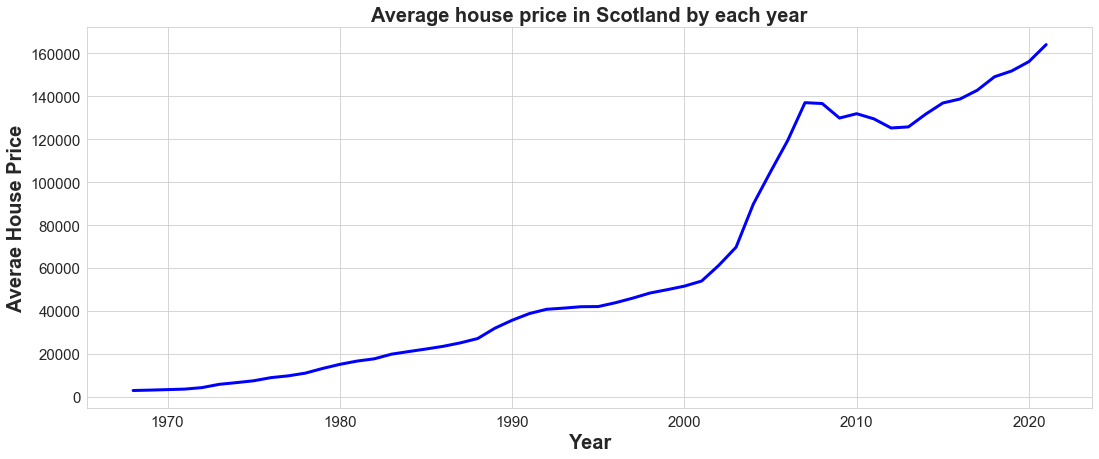

In [9]:
# Get all rows for Scotland
hps = df[df["RegionName"] == "Scotland"]

# Calculate average house price in Scotland by each year
ahps = hps.groupby("Year")["AveragePrice"].agg(["mean"]).reset_index()
ahps.columns = ["Year", "Average House Price"] 

# Line chart of Average house price in Scotland by each year
plt.figure(figsize = (18, 7))
sns.lineplot(x = "Year", y = "Average House Price", data = ahps, color = "blue", linewidth = 3)
plt.title("Average house price in Scotland by each year", size = 20, weight = "bold")
plt.xlabel("Year", size = 20, weight = "bold")
plt.ylabel("Averae House Price", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**2. Pie chart for sales value of flats, terraced, detached and semi detached properties in Aberdeenshire and Angus**

Aberdeenshire pie chart

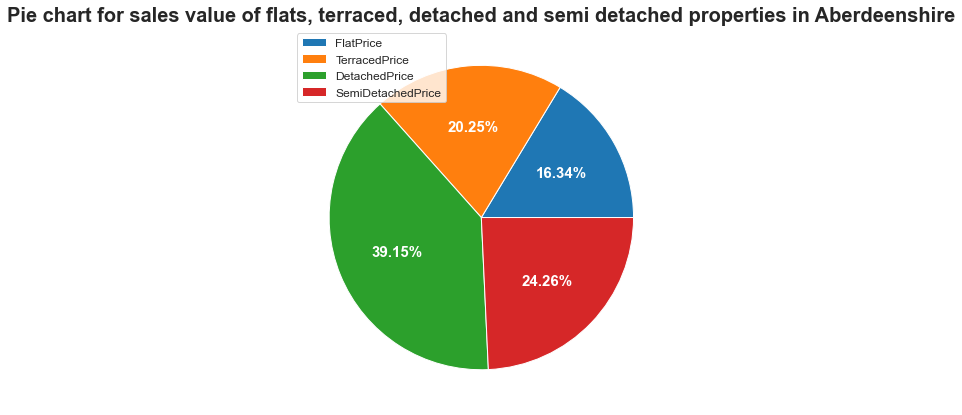

In [10]:
# Get all rows for Aberdeenshire
apc = df[df["RegionName"] == "Aberdeenshire"]

# Prices
apc_sales = apc[["FlatPrice", "TerracedPrice", "DetachedPrice", "SemiDetachedPrice"]]

# Total values
flat_price_aberdeenshire = np.sum(apc_sales["FlatPrice"])
terraced_price_aberdeenshire = np.sum(apc_sales["TerracedPrice"])
detached_price_aberdeenshire = np.sum(apc_sales["DetachedPrice"])
semi_detached_price_aberdeenshire = np.sum(apc_sales["SemiDetachedPrice"])

# Store data for visualization
data_aberdeenshire = [flat_price_aberdeenshire,  terraced_price_aberdeenshire, detached_price_aberdeenshire, semi_detached_price_aberdeenshire]
data_aberdeenshire_labels = ["FlatPrice", "TerracedPrice", "DetachedPrice", "SemiDetachedPrice"]

# Pie chart for sales value of flats, terraced, detached and semi detached properties in Aberdeenshire 
plt.figure(figsize = (18, 7))
plt.pie(data_aberdeenshire, 
        labels = data_aberdeenshire_labels,
        autopct='%1.2f%%', 
        textprops={'color':"w", 'fontsize': 15, 'weight': 'bold'})
plt.title("Pie chart for sales value of flats, terraced, detached and semi detached properties in Aberdeenshire", size = 20, weight = "bold")
plt.legend(data_aberdeenshire_labels, fontsize = 12)
plt.show()

Angus Pie Chart

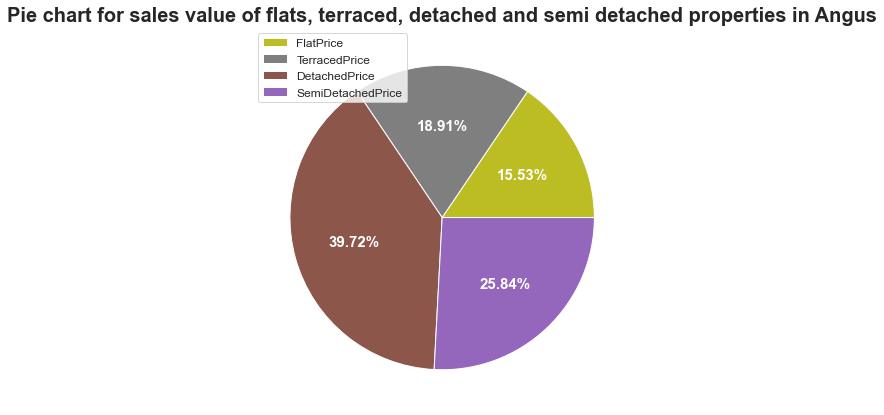

In [11]:
# Get all rows for Angus
agpc = df[df["RegionName"] == "Angus"]

# Prices
agpc_sales = agpc[["FlatPrice", "TerracedPrice", "DetachedPrice", "SemiDetachedPrice"]]

# Total values
flat_price_angus = np.sum(agpc_sales["FlatPrice"])
terraced_price_angus = np.sum(agpc_sales["TerracedPrice"])
detached_price_angus = np.sum(agpc_sales["DetachedPrice"])
semi_detached_price_angus = np.sum(agpc_sales["SemiDetachedPrice"])

# Store data for visualization
data_angus = [flat_price_angus,  terraced_price_angus, detached_price_angus, semi_detached_price_angus]
data_angus_labels = ["FlatPrice", "TerracedPrice", "DetachedPrice", "SemiDetachedPrice"]

# Pie chart for sales value of flats, terraced, detached and semi detached properties in Angus
colors = sns.color_palette("tab10_r")
plt.figure(figsize = (18, 7))
plt.pie(data_angus, 
        labels = data_angus_labels,
        colors = colors,
        autopct='%1.2f%%', 
        textprops={'color':"w", 'fontsize': 15, 'weight': 'bold'})
plt.title("Pie chart for sales value of flats, terraced, detached and semi detached properties in Angus", size = 20, weight = "bold")
plt.legend(data_angus_labels, fontsize = 12, loc = 2)
plt.show()

**3. Average sales volume of houses in the City of Edinburgh by months**

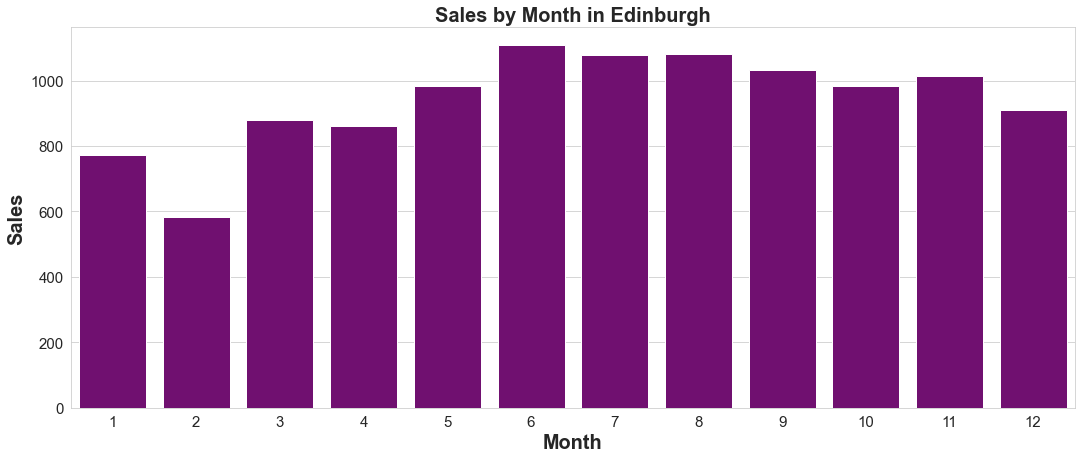

In [12]:
# Create month column
df["Month"] = df.index.month

# Get all rows for City of Edinburgh
e_df = df[df["RegionName"] == "City of Edinburgh"]

# Average sales volume of houses in the City of Edinburgh by months
esv_df = e_df.groupby("Month")["SalesVolume"].agg(["mean"]).reset_index()
esv_df.columns = ["Month", "Average Sales Volume"]
esv_df

# Bar chart of Average sales volume of houses in the City of Edinburgh by months
plt.figure(figsize = (18, 7))
sns.barplot(x = "Month", y = "Average Sales Volume", data = esv_df, color = "purple")
plt.title("Sales by Month in Edinburgh", size = 20, weight = "bold")
plt.xlabel("Month", size = 20, weight = "bold")
plt.ylabel("Sales", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Top 5 most expensive areas in Scotland**

In [13]:
# Area Code starts with "S" belongs to Scotland
scotland = [s for s in df["AreaCode"] if s.startswith("S")]

scotland_set = set(scotland)

scotland_list = list(scotland_set)

scotland_data = df[df["AreaCode"].isin(scotland_list)]

scotland_data_expensive = scotland_data.groupby("RegionName")["AveragePrice"].agg(["mean"]).reset_index()

scotland_data_expensive.columns = ["Scotland Region", "Average Price"]

scotland_data_expensive = scotland_data_expensive.sort_values(by = "Average Price", ascending = False).round(2).reset_index()

del scotland_data_expensive["index"]

scotland_data_expensive.head()

,Scotland Region,Average Price
0,City of Edinburgh,215952.40
1,East Renfrewshire,189801.40
2,East Lothian,187056.82
3,East Dunbartonshire,180262.11
4,Aberdeenshire,168955.88


**5. Find average sale volume in the City of Dundee to find best month for marketing campaign**

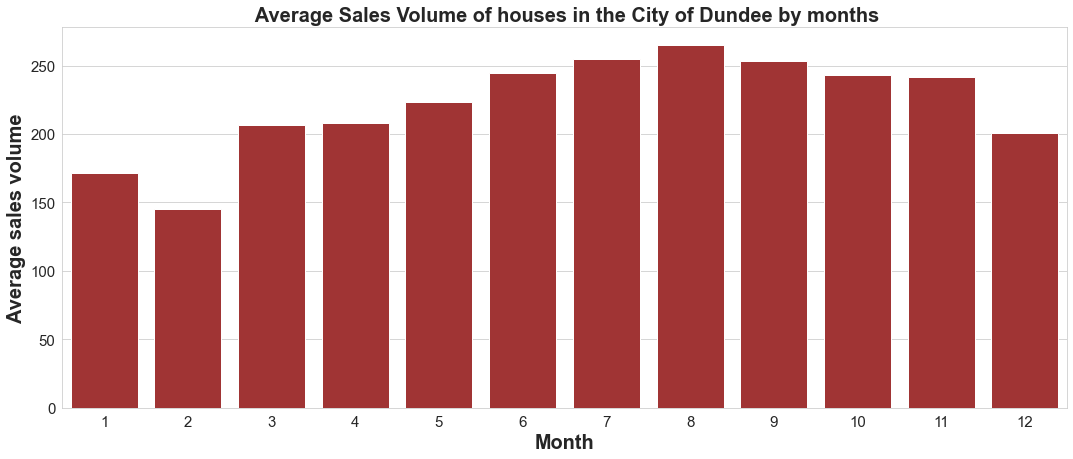

In [14]:
# Get all rows for City of Dundee
d_df = df[df["RegionName"] == "City of Dundee"]

# Month Group by Sales Volume
dm_df = d_df.groupby("Month")["SalesVolume"].agg(["mean"]).reset_index()
dm_df.columns = ["Month", "Average Sales Volume"]

# Bar chart of Average sales volume of houses in the City of Dundee by months for marketing campaign
plt.figure(figsize = (18, 7))
sns.barplot(x = "Month", y = "Average Sales Volume", data = dm_df, color = "firebrick")
plt.title(" Average Sales Volume of houses in the City of Dundee by months", size = 20, weight = "bold")
plt.xlabel("Month", size = 20, weight = "bold")
plt.ylabel("Average sales volume", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**6. Average sales volume in Carlisle for each year between 2010-2020**

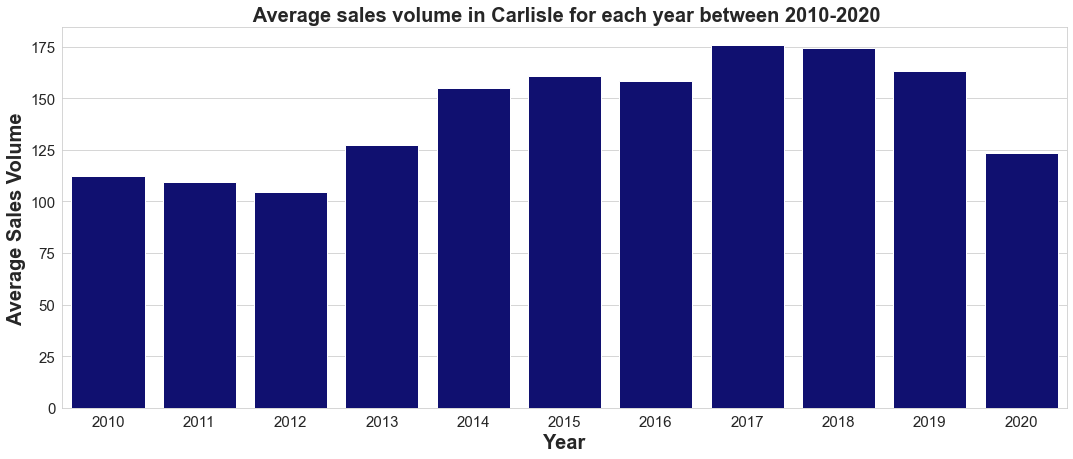

In [15]:
c_df = df[(df["RegionName"] == "Carlisle") & ((df["Year"] >= 2010) & (df["Year"] <= 2020))]

# Year group by Sales Volume
cy_df = c_df.groupby("Year")["SalesVolume"].agg(["mean"]).reset_index()
cy_df.columns = ["Year", "Average Sales Volume"]

# Bar chart of Average sales volume of houses in Carlisle by year (2010-2020)
plt.figure(figsize = (18, 7))
sns.barplot(x = "Year", y = "Average Sales Volume", data = cy_df, color = "navy")
plt.title(" Average sales volume in Carlisle for each year between 2010-2020", size = 20, weight = "bold")
plt.xlabel("Year", size = 20, weight = "bold")
plt.ylabel("Average Sales Volume", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**7. Average price of a flat in Carlisle for each year from 2010-2020**

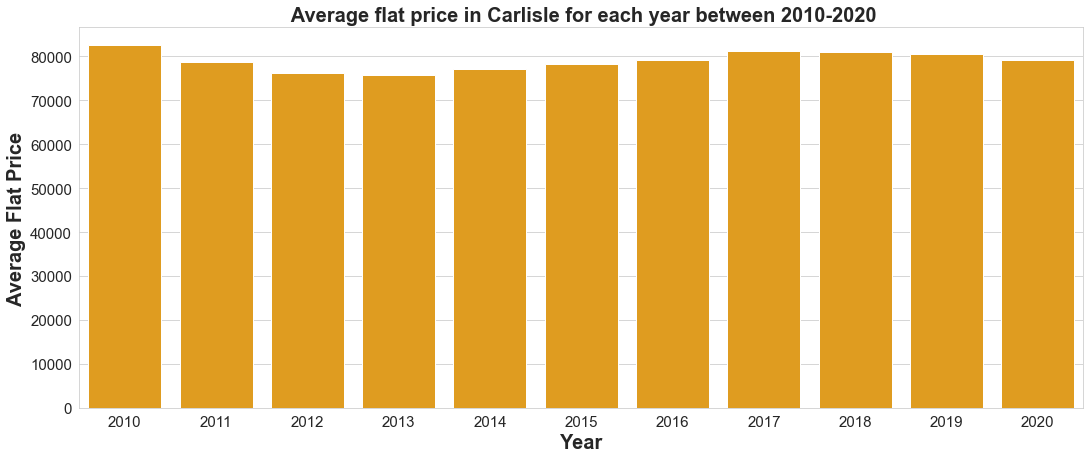

In [16]:
# Year group by Flat Price
cf_df = c_df.groupby("Year")["FlatPrice"].agg(["mean"]).reset_index()
cf_df.columns = ["Year", "Average Flat Price"]

# Bar chart of Average sales volume of houses in Carlisir by year (2010-2020)
plt.figure(figsize = (18, 7))
sns.barplot(x = "Year", y = "Average Flat Price", data = cf_df, color = "orange")
plt.title(" Average flat price in Carlisle for each year between 2010-2020", size = 20, weight = "bold")
plt.xlabel("Year", size = 20, weight = "bold")
plt.ylabel("Average Flat Price", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**8. Average price of a flat in the City of Glasgow for each year from 2010-2020**

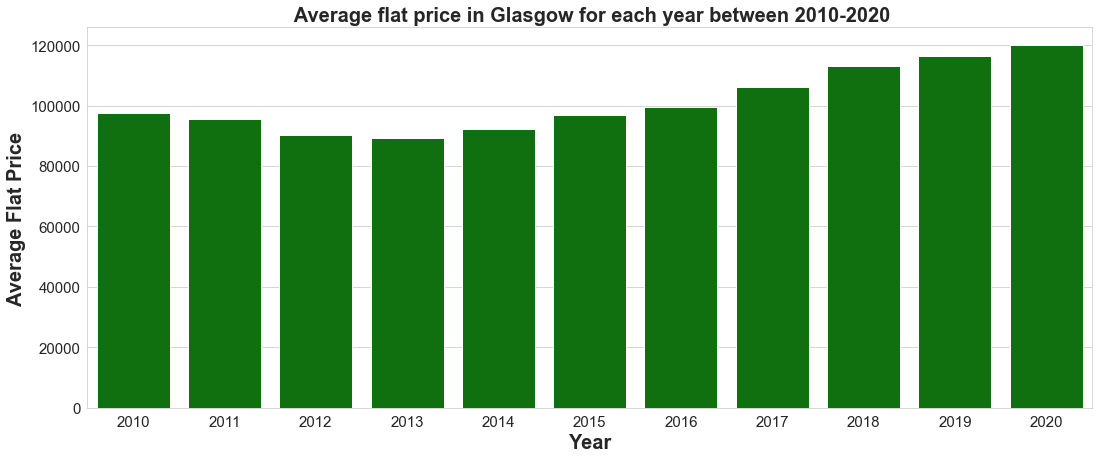

In [17]:
g_df = df[(df["RegionName"] == "City of Glasgow") & ((df["Year"] >= 2010) & (df["Year"] <= 2020))]

# Year group by Sales Volume
gf_df = g_df.groupby("Year")["FlatPrice"].agg(["mean"]).reset_index()
gf_df.columns = ["Year", "Average Flat Price"]

# Bar chart of Average flat price of houses in the City of Glasgow by year (2010-2020)
plt.figure(figsize = (18, 7))
sns.barplot(x = "Year", y = "Average Flat Price", data = gf_df, color = "green")
plt.title(" Average flat price in Glasgow for each year between 2010-2020", size = 20, weight = "bold")
plt.xlabel("Year", size = 20, weight = "bold")
plt.ylabel("Average Flat Price", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**9. Correlation between the two sets of values used in questions 7 and 8?**

In [18]:
print("Correlation between average flat price in Carlisle and avarage flat price in Glasgow =", 
      cf_df[["Average Flat Price"]].corrwith(gf_df[["Average Flat Price"]]).values)

Correlation between average flat price in Carlisle and avarage flat price in Glasgow = [0.59957491]


**10. Carlisle flat price prediction based on City of Glasgow flat price**

In [19]:
# Prepare Dataset by selectiong flat prices of Carlisle and City of Glasggow
cg = df[(df["RegionName"] == "Carlisle") | (df["RegionName"] == "City of Glasgow")]

In [20]:
# Pivot Table to show values of flat prices of Carlisle and City of Glasggow
cg = pd.pivot_table(index = cg.index, columns = "RegionName", values = "FlatPrice", data = cg)
cg = cg.dropna()
cg.columns.name = None
cg.tail()

,Carlisle,City of Glasgow
Date,,
2020-09-01,79495.33942,123986.1248
2020-10-01,79615.56245,126031.5629
2020-11-01,80770.36695,128451.9430
2020-12-01,81070.74552,128286.5400
2021-01-01,80422.67146,129540.2624


In [21]:
# Feature
X = cg[["City of Glasgow"]]

# Target
y = cg["Carlisle"]

**Prediction using Random Forest**

In [22]:
rf = RandomForestRegressor(random_state = 0)

rf.fit(X, y)

prediction_rf = rf.predict([[140000]])

print("Prediction of Carlisle flat price by using Random Forest model =", prediction_rf)

Prediction of Carlisle flat price by using Random Forest model = [80574.1407752]


**Prediction using XGBoost** 

In [23]:
custom = pd.DataFrame({"City of Glasgow": [140000]})

In [24]:
xg = xgb.XGBRegressor(random_state = 0)

xg.fit(X, y)

prediction_xg = xg.predict(custom)

print("Prediction of Carlisle flat price by using XGBoost model =", prediction_xg)

Prediction of Carlisle flat price by using XGBoost model = [80431.54]


**Prediction using correlation value**

In [25]:
print("Prediction of Carlisle flat price by using correlation value =", 140000 * 0.59957491)

Prediction of Carlisle flat price by using correlation value = 83940.4874
